<a href="https://colab.research.google.com/github/ldockx/my-first-data-engineering-project/blob/clean-up/first_data_engineering_effort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
import time

# Replace these with your own Strava API credentials
CLIENT_ID = "179478" #client_id
CLIENT_SECRET = "22acdfc6850d9a81a189b4a42d9b4fa8fead0dfb" #client_secret
REFRESH_TOKEN = "99ef40a0681db2d625f1e43531b91d6c516a6949" #refresh_token

# Step 1: Get a new access token using your refresh token
def get_access_token():
    auth_url = "https://www.strava.com/oauth/token"
    payload = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "refresh_token": REFRESH_TOKEN,
        "grant_type": "refresh_token"
    }
    response = requests.post(auth_url, data=payload)
    response.raise_for_status()
    access_token = response.json()["access_token"]
    return access_token

def get_all_activities(access_token, per_page=200):
    """Retrieve *all* user activities, not just the first page."""
    activities = []
    page = 1
    while True:
        print(f"Fetching page {page}...")
        url = "https://www.strava.com/api/v3/athlete/activities"
        headers = {"Authorization": f"Bearer {access_token}"}
        params = {"per_page": per_page, "page": page}
        response = requests.get(url, headers=headers, params=params)

        if response.status_code != 200:
            print(f"Error {response.status_code}: {response.text}")
            break

        data = response.json()
        if not data:
            print("No more activities found — all data retrieved.")
            break

        activities.extend(data)
        page += 1
        time.sleep(0.2)  # be gentle to Strava's API limits

    return activities

if __name__ == "__main__":
    token = get_access_token()
    activities = get_all_activities(token)#, per_page=200, page=1)

    # Print activities in readable format
    #print(json.dumps(activities, indent=2))
    data = pd.read_json(json.dumps(activities, indent=2))


Fetching page 1...
Fetching page 2...
Fetching page 3...
No more activities found — all data retrieved.


/tmp/ipython-input-384037552.py:66: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(json.dumps(activities, indent=2))


In [ ]:
data.head(10)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,has_kudoed,average_cadence,average_watts,max_watts,weighted_average_watts,device_watts,kilojoules,Day,Month,Year
0,2,"{'id': 54565248, 'resource_state': 1}",Middagtraining,0.0,3784,3784,0.0,Workout,Workout,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,10,2025
1,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,8069.6,2371,2371,4.0,Run,Run,NaN,...,False,86.6,422.9,580.0,422.0,1.0,1002.1,1,10,2025
2,2,"{'id': 54565248, 'resource_state': 1}",Middagloop,30008.0,10392,11110,49.0,Run,Run,NaN,...,False,85.4,356.1,529.0,349.0,1.0,3696.0,28,9,2025
3,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6017.3,2016,2094,7.0,Run,Run,NaN,...,False,83.0,363.2,702.0,405.0,1.0,717.5,22,9,2025
4,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,16590.7,5590,5654,17.0,Run,Run,NaN,...,False,84.2,371.7,479.0,371.0,1.0,2078.8,19,9,2025
5,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,8510.4,3027,3192,64.0,Run,Run,NaN,...,False,82.9,352.0,619.0,348.0,1.0,1066.8,17,9,2025
6,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,25031.2,8175,8187,26.0,Run,Run,NaN,...,False,84.1,387.9,539.0,389.0,1.0,3171.4,12,9,2025
7,2,"{'id': 54565248, 'resource_state': 1}",Avondintervallen,7015.7,2243,2243,5.0,Run,Run,NaN,...,False,82.4,385.5,672.0,416.0,1.0,862.2,10,9,2025
8,2,"{'id': 54565248, 'resource_state': 1}",Ochtendloop,5290.1,1701,1701,27.0,Run,Run,NaN,...,False,84.9,387.8,544.0,389.0,1.0,659.6,8,9,2025
9,2,"{'id': 54565248, 'resource_state': 1}",Ochtendhike,20732.2,20135,22871,1147.0,Hike,Hike,NaN,...,False,54.4,NaN,NaN,NaN,NaN,NaN,7,9,2025


In [ ]:
# 1️⃣ Convert start_date to datetime
data["start_date"] = pd.to_datetime(data["start_date"])

#add date columns
data["Day"] = data["start_date"].dt.day
data["Month"] = data["start_date"].dt.month
data["Year"] = data["start_date"].dt.year

In [ ]:
data

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,has_kudoed,average_cadence,average_watts,max_watts,weighted_average_watts,device_watts,kilojoules,Day,Month,Year
0,2,"{'id': 54565248, 'resource_state': 1}",Middagtraining,0.0,3784,3784,0.0,Workout,Workout,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,10,2025
1,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,8069.6,2371,2371,4.0,Run,Run,NaN,...,False,86.6,422.9,580.0,422.0,1.0,1002.1,1,10,2025
2,2,"{'id': 54565248, 'resource_state': 1}",Middagloop,30008.0,10392,11110,49.0,Run,Run,NaN,...,False,85.4,356.1,529.0,349.0,1.0,3696.0,28,9,2025
3,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6017.3,2016,2094,7.0,Run,Run,NaN,...,False,83.0,363.2,702.0,405.0,1.0,717.5,22,9,2025
4,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,16590.7,5590,5654,17.0,Run,Run,NaN,...,False,84.2,371.7,479.0,371.0,1.0,2078.8,19,9,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,7013.9,2112,2115,57.4,Run,Run,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,7,4,2023
281,2,"{'id': 54565248, 'resource_state': 1}",Namiddagzwemsessie,2000.0,2977,2977,0.0,Swim,Swim,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,4,2023
282,2,"{'id': 54565248, 'resource_state': 1}",Namiddagzwemsessie,1400.0,2341,2341,0.0,Swim,Swim,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2023
283,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6837.9,2240,2253,29.8,Run,Run,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,22,3,2023


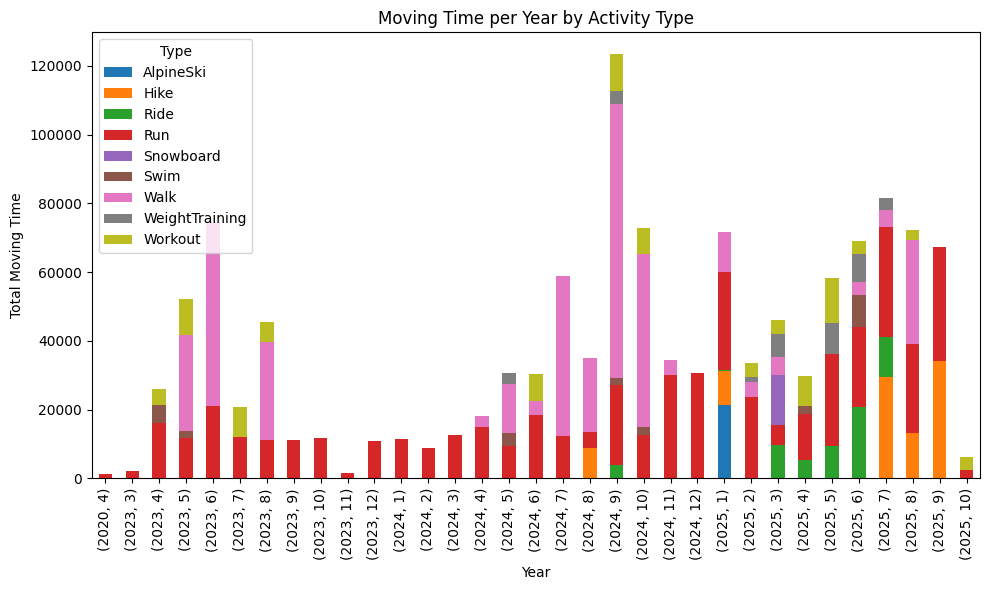

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example assumes your DataFrame has at least these columns:
# 'Month', 'distance', and 'type'

# 1️⃣ Group data by Month and Type, summing distance
grouped = data.groupby(["Year", "Month", "type"])["moving_time"].sum().unstack(fill_value=0)

# 2️⃣ Plot stacked bar chart
grouped.plot(kind="bar", stacked=True, figsize=(10,6))

# 3️⃣ Customize chart
plt.title("Moving Time per Year by Activity Type")
plt.xlabel("Year")
plt.ylabel("Total Moving Time")
plt.legend(title="Type")
plt.tight_layout()
plt.show()
